In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reset if needed below
# warnings.filterwarnings("default")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', '{:.2f}'.format)

from matplotlib.ticker import ScalarFormatter

In [2]:
# read csv and excel files from model outputs to obtain loan risk scores

# Average risk score read
avg_risk_score = pd.read_csv('ppp_risk.csv')

# Scikit-Learn Isolation Forest model risk score read
sklearn_risk_score = pd.read_csv('ppp_model_final.csv')

# H2O Isolation Forest model risk score
h2o_risk_score = pd.read_csv('ppp_H20IF_model_results (1).csv')

In [3]:
# Clean column names to refer to each model
sklearn_risk_score.rename(columns ={'score':'sklearn_score', 'anomaly_score':'sklearn_anomaly_score', 'normalized_scores':'sklearn_normalized_scores', 'anomaly':'sklearn_anomaly'}, inplace = True)

h2o_risk_score.rename(columns = {'Isolation_Forest_Anomaly_Score':'h2o_if_anomaly_score', 'Isolation_Forest_Mean_length':'h2o_if_mean_length', 'anomaly':'h2o_if_anomaly'}, inplace = True)

In [4]:
# Merge columns into one dataframe
merged_data = pd.merge(sklearn_risk_score,
                       h2o_risk_score[['LoanNumber', 'h2o_if_anomaly_score', 'h2o_if_mean_length', 'h2o_if_anomaly']],
                       on='LoanNumber',
                       how='left')
merged_data.head(1)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score,state_name,scores,sklearn_anomaly_score,sklearn_normalized_scores,sklearn_anomaly,h2o_if_anomaly_score,h2o_if_mean_length,h2o_if_anomaly
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83,0.00,999.00,0.00,0.00,0.00,0.00,0.00,999.00,0.00,999.00,999.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.96,0.96,0.35,0,0.12,1,0.78,0,0.01,20.89,0


In [5]:
# Check anomaly value counts
print(merged_data['sklearn_anomaly'].value_counts())


print(merged_data['h2o_if_anomaly'].value_counts())

0    955892
1      9656
Name: sklearn_anomaly, dtype: int64
0    945954
1     19594
Name: h2o_if_anomaly, dtype: int64


In [6]:
# Print percentage of anomalies from sci-kit learn isolation forest model
(len(merged_data[merged_data['sklearn_anomaly']==1])/len(merged_data))*100

1.000053855427177

In [7]:
# Print percentage of anomalies from h2o learn isolation forest model
(len(merged_data[merged_data['h2o_if_anomaly']==1])/len(merged_data))*100

2.0293139232850153

In [8]:
# Assign top 1.5% of average risk score loans as anomalies 
threshold = merged_data['average_risk_score'].quantile(0.985)
threshold

0.5447933137069406

In [9]:
# Check how many loans are in top 1.5% AVR score
len(merged_data[merged_data['average_risk_score']>merged_data['average_risk_score'].quantile(0.985)])

14484

In [10]:
# How many loans identifed as anomaly by SKL IF
len(merged_data[merged_data['sklearn_anomaly']==1])

9656

In [11]:
# How many loans identifed as anomaly by H2O IF
len(merged_data[merged_data['h2o_if_anomaly']==1])

19594

In [12]:
# Create the new column based on the condition
merged_data['average_risk_score_anomaly_indicator'] = 0
merged_data.loc[merged_data['average_risk_score'] >= threshold, 'average_risk_score_anomaly_indicator'] = 1
merged_data['average_risk_score_anomaly_indicator'].value_counts()

0    951064
1     14484
Name: average_risk_score_anomaly_indicator, dtype: int64

In [13]:
merged_data.head(1)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score,state_name,scores,sklearn_anomaly_score,sklearn_normalized_scores,sklearn_anomaly,h2o_if_anomaly_score,h2o_if_mean_length,h2o_if_anomaly,average_risk_score_anomaly_indicator
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83,0.00,999.00,0.00,0.00,0.00,0.00,0.00,999.00,0.00,999.00,999.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.96,0.96,0.35,0,0.12,1,0.78,0,0.01,20.89,0,0


In [14]:
# Inverse SKL normalized scores
merged_data['sklearn_normalized_scores'] = 1 - merged_data['sklearn_normalized_scores']

In [15]:
# Calculating final average ensemble anomaly score
merged_data['final_anomaly_score'] = merged_data[['average_risk_score', 'sklearn_normalized_scores', 'h2o_if_anomaly_score']].mean(axis=1)
merged_data.head(1)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score,state_name,scores,sklearn_anomaly_score,sklearn_normalized_scores,sklearn_anomaly,h2o_if_anomaly_score,h2o_if_mean_length,h2o_if_anomaly,average_risk_score_anomaly_indicator,final_anomaly_score
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83,0.00,999.00,0.00,0.00,0.00,0.00,0.00,999.00,0.00,999.00,999.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.96,0.96,0.35,0,0.12,1,0.22,0,0.01,20.89,0,0,0.20


In [16]:
# Calculating final anomaly score threshold for top 1.5% most anomalous loans
merged_data['final_anomaly_score'].quantile(0.985)

0.3277447048747592

In [17]:
merged_data[merged_data['final_anomaly_score']>merged_data['final_anomaly_score'].quantile(0.985)].head(5)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score,state_name,scores,sklearn_anomaly_score,sklearn_normalized_scores,sklearn_anomaly,h2o_if_anomaly_score,h2o_if_mean_length,h2o_if_anomaly,average_risk_score_anomaly_indicator,final_anomaly_score
13,5502308207,2020-08-08,1084,PPP,"KAKIVIK ASSET MANAGEMENT, LLC",5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503,2021-07-22,PAID IN FULL,60,100,9571397.00,9538531.00,0.00,UNKNOWN/NOTSTATED,116975,NORTHRIM BANK,3111 'C' ST,ANCHORAGE,AK,99503,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,ANCHORAGE,ANCHORAGE,AK,99503,AK-,385.00,541990.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,9538531.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),116975,NORTHRIM BANK,ANCHORAGE,AK,UNANSWERED,UNANSWERED,N,9615884.57,2021-06-11,0,1,0,0,0,0,0,"All Other Professional, Scientific and Technic...",42.10,1,-77353.57,-32866.00,-85.37,24860.77,24775.41,0.00,24775.41,0.00,0.00,0.00,0.00,0.00,24976.32,0,0,0.00,226586.28,0.00,0.00,0.00,0.00,0.00,228423.81,-780.73,227367.01,226586.28,8.15,1.00,0.00,41.10,0.00,0.00,0.00,0.00,0.00,41.10,41.10,41.10,41.10,0.00,0.34,0.00,0.00,0.00,0.00,0.00,0.36,0.97,0.34,0.34,0.21,Alaska,-0.04,-1,0.61,1,0.23,18.44,1,0,0.35
15,4539098204,2020-08-06,1084,PPP,CORVUS AIRLINES INC,4700 OLD INTERNATIONAL AIRPORT RD,ANCHORAGE,AK,99502,2021-07-22,EXEMPTION 4,60,100,7398947.89,7398947.89,0.00,UNKNOWN/NOTSTATED,436276,IDAHO FIRST BANK,475 E D

In [18]:
# count how many loans identified as anomaly by all three models
len(merged_data[(merged_data['sklearn_anomaly'] == 1) & 
                                      (merged_data['h2o_if_anomaly'] == 1) & 
                                      (merged_data['average_risk_score_anomaly_indicator'] == 1)])


2642

In [19]:
merged_data[(merged_data['sklearn_anomaly'] == 1) & 
                                      (merged_data['h2o_if_anomaly'] == 1) & 
                                      (merged_data['average_risk_score_anomaly_indicator'] == 1)].head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score,state_name,scores,sklearn_anomaly_score,sklearn_normalized_scores,sklearn_anomaly,h2o_if_anomaly_score,h2o_if_mean_length,h2o_if_anomaly,average_risk_score_anomaly_indicator,final_anomaly_score
117,8147537110,2020-04-15,1084,PPP,"ALASKA RUBBER GROUP, INC",5811 OLD SEWARD HWY,ANCHORAGE,AK,99518,2021-07-08,PAID IN FULL,24,100,1854173.13,1854173.13,0.00,UNKNOWN/NOTSTATED,3386,FIRST NATIONAL BANK ALASKA,101 W 36TH AVE,ANCHORAGE,AK,99503,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,ANCHORAGE,ANCHORAGE,AK,99518,AK-,135.00,551112.00,UNANSWERED,UNKNOWN/NOTSTATED,114887.06,1160737.57,151421.00,152464.00,0.00,274663.50,0.00,CORPORATION,3386,FIRST NATIONAL BANK ALASKA,ANCHORAGE,AK,UNANSWERED,UNANSWERED,N,1874848.43,2021-06-04,1,1,1,1,0,1,0,Offices of Other Holding Companies,69.21,1,-20675.30,0.00,0.00,13734.62,13734.62,851.02,8598.06,1121.64,1129.36,0.00,2034.54,0.00,13887.77,0,0,1659.97,16771.21,2187.84,2202.91,0.00,3968.54,0.00,27089.21,0.00,26790.48,26790.48,0.95,0.85,68.21,68.21,68.21,68.21,0.00,68.21,0.00,68.21,0.00,68.21,68.21,0.90,0.71,0.99,0.97,0.00,0.98,0.00,0.71,0.00,0.71,0.71,0.61,Alaska,-0.03,-1,0.59,1,0.08,20.14,1,1,0.43
143,4184767110,2020-04-13,1084,PPP,"FLOWLINE ALASKA, INC.",1881 LIVENGOOD AVENUE,FAIRBANKS,AK,99701,2021-07-08,PAID IN FULL,24,100,1231872.72,1647198.03,0.00,UNKNOWN/NOTSTATED,3386,FIRST NATIONAL BANK 

In [20]:
# assign top 1.5% final_anomaly_scores as anomalies
final_threshold = merged_data['final_anomaly_score'].quantile(0.985)

merged_data['final_blended_anomaly_indicator'] = 0
merged_data.loc[merged_data['final_anomaly_score'] >= final_threshold, 'final_blended_anomaly_indicator'] = 1
merged_data['final_blended_anomaly_indicator'].value_counts()

0    951064
1     14484
Name: final_blended_anomaly_indicator, dtype: int64

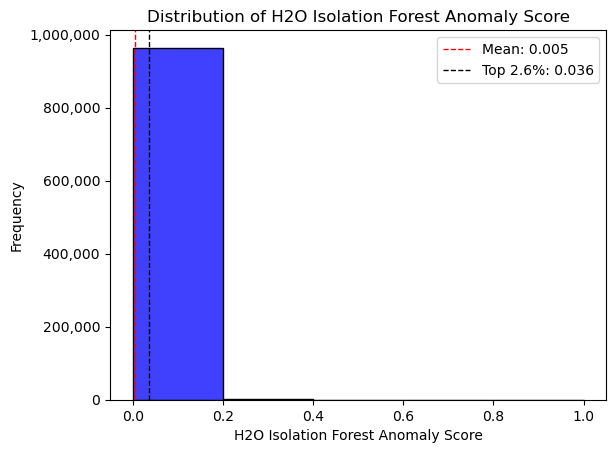

In [21]:
# Plotting the histogram using Seaborn
sns.histplot(merged_data['h2o_if_anomaly_score'], bins=5, color='blue')  # Adjust the number of bins as needed

# Formatting y-axis labels with commas for thousands separator
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Setting titles and labels
plt.title('Distribution of H2O Isolation Forest Anomaly Score')
plt.xlabel('H2O Isolation Forest Anomaly Score')
plt.ylabel('Frequency')

# Show mean line and threshold line
mean_score = merged_data['h2o_if_anomaly_score'].mean()
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_score:.3f}')
threshold = merged_data['h2o_if_anomaly_score'].quantile(0.9740085423)
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=1, label=f'Top 2.6%: {threshold:.3f}')
plt.legend()

# Save the plot as a PNG file
plt.savefig('ppp_h2o_score_hist.png', dpi=300, bbox_inches='tight')

plt.show()

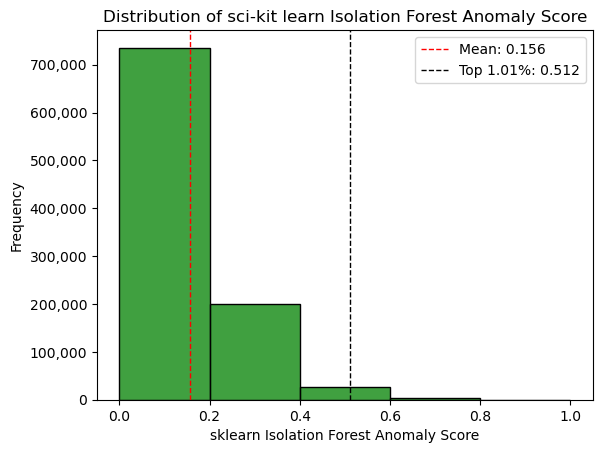

In [22]:
# Plotting the histogram using Seaborn
sns.histplot(merged_data['sklearn_normalized_scores'], bins=5, color='green')  # Adjust the number of bins as needed

# Formatting y-axis labels with commas for thousands separator
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Setting titles and labels
plt.title('Distribution of sci-kit learn Isolation Forest Anomaly Score')
plt.xlabel('sklearn Isolation Forest Anomaly Score')
plt.ylabel('Frequency')

# Show mean line
mean_score = merged_data['sklearn_normalized_scores'].mean()
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_score:.3f}')
threshold = merged_data['sklearn_normalized_scores'].quantile(0.98989844041)
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=1, label=f'Top 1.01%: {threshold:.3f}')
plt.legend()

# Save the plot as a PNG file 
plt.savefig('ppp_skl_score_hist.png', dpi=300, bbox_inches='tight')

plt.show()

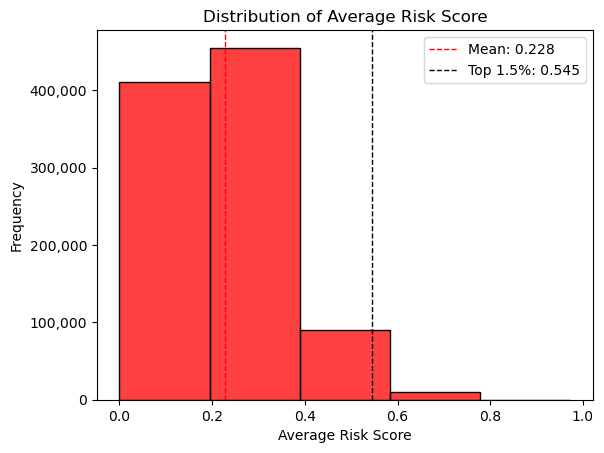

In [23]:
# Plotting the histogram using Seaborn
sns.histplot(merged_data['average_risk_score'], bins=5, color='red')  # Adjust the number of bins as needed

# Formatting y-axis labels with commas for thousands separator
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Setting titles and labels
plt.title('Distribution of Average Risk Score')
plt.xlabel('Average Risk Score')
plt.ylabel('Frequency')

# Show mean line
mean_score = merged_data['average_risk_score'].mean()
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_score:.3f}')
threshold = merged_data['average_risk_score'].quantile(0.985)
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=1, label=f'Top 1.5%: {threshold:.3f}')
plt.legend()

# Save the plot as a PNG file 
plt.savefig('ppp_avr_score_hist.png', dpi=300, bbox_inches='tight')

plt.show()

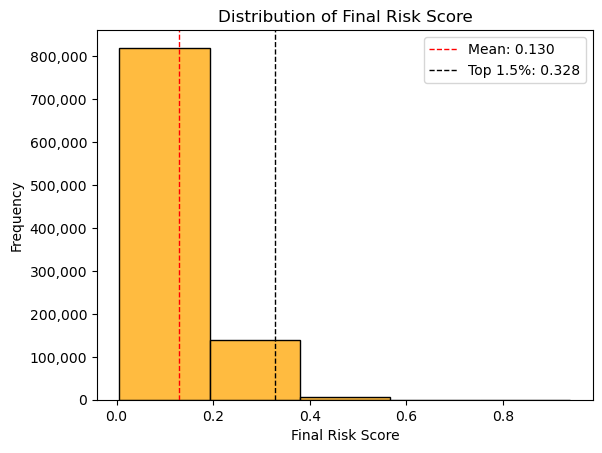

In [24]:
# Plotting the histogram using Seaborn
sns.histplot(merged_data['final_anomaly_score'], bins=5, color='orange')  # Adjust the number of bins as needed

# Formatting y-axis labels with commas for thousands separator
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Setting titles and labels
plt.title('Distribution of Final Risk Score')
plt.xlabel('Final Risk Score')
plt.ylabel('Frequency')

# Show mean line
mean_score = merged_data['final_anomaly_score'].mean()
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_score:.3f}')
threshold = merged_data['final_anomaly_score'].quantile(0.985)
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=1, label=f'Top 1.5%: {threshold:.3f}')
plt.legend()

# Save the plot as a PNG file 
plt.savefig('ppp_final_score_hist.png', dpi=300, bbox_inches='tight')

plt.show()

In [25]:
merged_data.to_csv('final_blended_ppp_scores.csv', index = False)

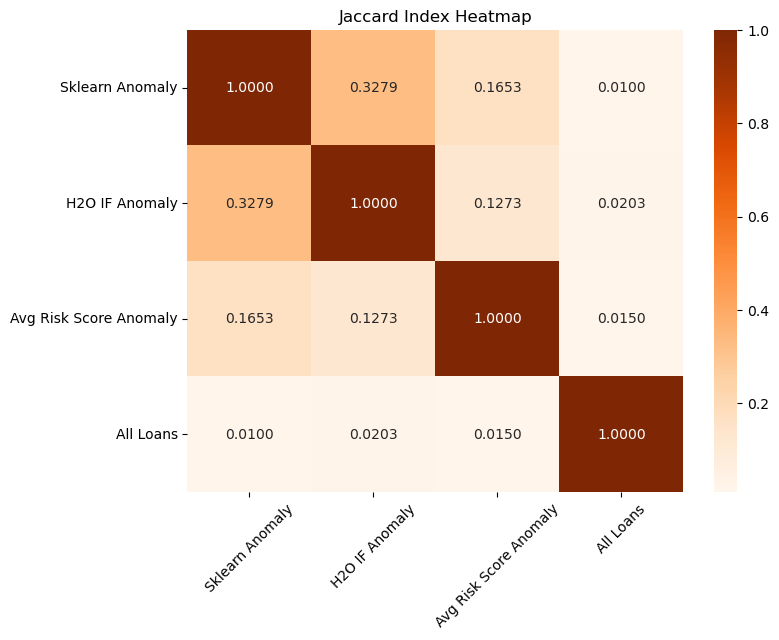

In [27]:
# Calculate Jaccard Index for all anomaly subsets

# Unique LoanNumbers for each subset
sklearn_anomaly_loans = set(merged_data.loc[merged_data['sklearn_anomaly'] == 1, 'LoanNumber'].unique())
h2o_if_anomaly_loans = set(merged_data.loc[merged_data['h2o_if_anomaly'] == 1, 'LoanNumber'].unique())
avg_risk_score_anomaly_loans = set(merged_data.loc[merged_data['average_risk_score_anomaly_indicator'] == 1, 'LoanNumber'].unique())
all_loans = set(merged_data['LoanNumber'].unique())

# Calculate Jaccard indices for each pair of subsets
jaccard_sklearn_h2o = round(len(sklearn_anomaly_loans.intersection(h2o_if_anomaly_loans)) / len(sklearn_anomaly_loans.union(h2o_if_anomaly_loans)), 4)
jaccard_sklearn_avg_risk = round(len(sklearn_anomaly_loans.intersection(avg_risk_score_anomaly_loans)) / len(sklearn_anomaly_loans.union(avg_risk_score_anomaly_loans)), 4)
jaccard_h2o_avg_risk = round(len(h2o_if_anomaly_loans.intersection(avg_risk_score_anomaly_loans)) / len(h2o_if_anomaly_loans.union(avg_risk_score_anomaly_loans)), 4)
jaccard_sklearn_all = round(len(sklearn_anomaly_loans.intersection(all_loans)) / len(sklearn_anomaly_loans.union(all_loans)), 4)
jaccard_h2o_all = round(len(h2o_if_anomaly_loans.intersection(all_loans)) / len(h2o_if_anomaly_loans.union(all_loans)), 4)
jaccard_avg_risk_all = round(len(avg_risk_score_anomaly_loans.intersection(all_loans)) / len(avg_risk_score_anomaly_loans.union(all_loans)), 4)

# Create a DataFrame for Jaccard indices
jaccard_df = pd.DataFrame({
    '': ['Sklearn Anomaly', 'H2O IF Anomaly', 'Avg Risk Score Anomaly', 'All Loans'],
    'Sklearn Anomaly': [1.0, jaccard_sklearn_h2o, jaccard_sklearn_avg_risk, jaccard_sklearn_all],
    'H2O IF Anomaly': [jaccard_sklearn_h2o, 1.0, jaccard_h2o_avg_risk, jaccard_h2o_all],
    'Avg Risk Score Anomaly': [jaccard_sklearn_avg_risk, jaccard_h2o_avg_risk, 1.0, jaccard_avg_risk_all],
    'All Loans': [jaccard_sklearn_all, jaccard_h2o_all, jaccard_avg_risk_all, 1.0]
})

# Set index names
jaccard_df.set_index('', inplace=True)

# Display the Jaccard Index DataFrame
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(jaccard_df, annot=True, cmap="Oranges", fmt=".4f")
plt.title('Jaccard Index Heatmap')
plt.xticks(rotation=45)
plt.show()